In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

df=pd.read_csv('Nifty.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.head()

,Index Name,Open,High,Low,Close
Date,,,,,
2024-09-06,NIFTY,25093.70,25168.75,24801.30,24852.15
2024-09-05,NIFTY,25250.50,25275.45,25127.75,25145.10
2024-09-04,NIFTY,25089.95,25216.00,25083.80,25198.70
2024-09-03,NIFTY,25313.40,25321.70,25235.80,25279.85
2024-09-02,NIFTY,25333.60,25333.65,25235.50,25278.70


In [4]:
df['MA9']=df['Close'].rolling(window=9).mean()
df.dropna(inplace=True)
df.head()




,Index Name,Open,High,Low,Close,MA9
Date,,,,,,
2024-08-27,NIFTY,25024.80,25073.10,24973.65,25017.75,25134.716667
2024-08-26,NIFTY,24906.10,25043.80,24874.70,25010.60,25152.322222
2024-08-23,NIFTY,24845.40,24858.40,24771.65,24823.15,25116.550000
2024-08-22,NIFTY,24863.40,24867.35,24784.45,24811.50,25073.527778
2024-08-21,NIFTY,24680.55,24787.95,24654.50,24770.20,25016.900000


In [5]:
x=df[['Open','High','Low','MA9']]
y=df['Close']

In [6]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,shuffle=False)


In [7]:
y_test

Date
2020-12-02    13113.75
2020-12-01    13109.05
2020-11-27    12968.95
2020-11-26    12987.00
2020-11-25    12858.40
                ...   
2020-01-07    12052.95
2020-01-06    11993.05
2020-01-03    12226.65
2020-01-02    12282.20
2020-01-01    12182.50
Name: Close, Length: 232, dtype: float64

In [8]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [9]:
from sklearn.linear_model import LinearRegression


In [10]:
lr=LinearRegression()

lr.fit(x_train_scaled,y_train)

LinearRegression()

In [11]:
y_pred=lr.predict(x_test_scaled)

In [14]:
mse=mean_squared_error(y_test,y_pred)
print(mse)
r2=r2_score(y_test,y_pred)
print(r2)

3428.7363067758615
0.9978508164277632


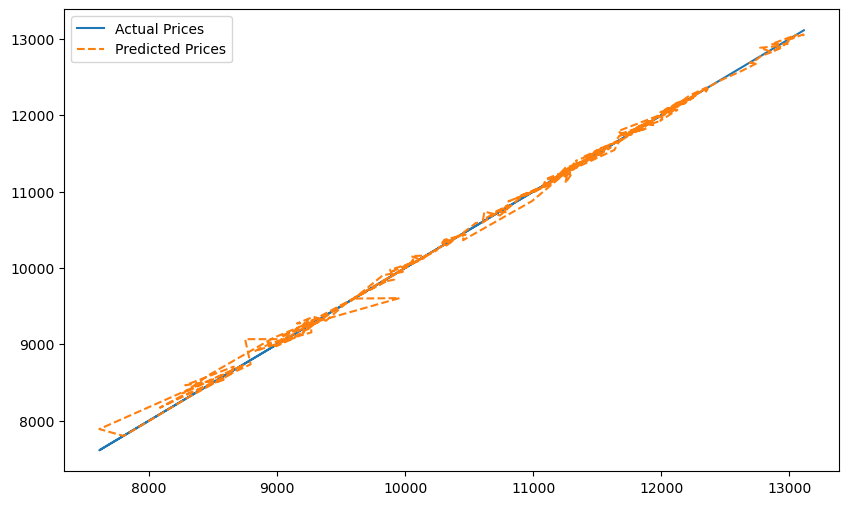

In [15]:
plt.figure(figsize=(10,6))
plt.plot(y_test, y_test, label='Actual Prices')
plt.plot(y_test, y_pred, label='Predicted Prices', linestyle='--')
plt.legend()
plt.show()

In [17]:
y_pred

array([13039.6864604 , 13059.75693021, 12972.91272776, 12933.63814186,
       12931.07119848, 13054.26310463, 12874.28361148, 12830.36777645,
       12884.38873839, 12910.52013545, 12834.87067859, 12777.10272618,
       12697.28141113, 12686.3350649 , 12684.91677029, 12583.92049891,
       12456.19111986, 12270.42612114, 12121.33858944, 11923.81151936,
       11844.56561155, 11648.02147584, 11658.95843183, 11727.99352508,
       11757.68504632, 11828.20429525, 11773.42280161, 11927.30911135,
       11878.9011969 , 11871.22056226, 11917.35087524, 11850.73226867,
       11743.97155052, 11757.43483032, 11914.66724984, 11944.3597388 ,
       11933.84075191, 11893.82006354, 11865.13466437, 11723.46995312,
       11651.8319908 , 11554.68229551, 11426.09178736, 11266.30782683,
       11240.80404816, 11214.97521059, 11036.18729899, 10871.31019697,
       11091.03459912, 11141.17576177, 11310.46100188, 11464.79165779,
       11534.42620129, 11576.96368409, 11486.35247626, 11441.94684234,
      